<div class="alert alert-block alert-info">
    <b>Welcome to this tutorial!</b>
<br>
This tutorial will introduce how to go from Spreadsheets into Python!
</div>

In [34]:
# Import the pandas package as pd
import pandas as pd
import seaborn as sns

In [18]:
# Use the read_excel function to load ticket_sales.xlsx
sales= pd.read_excel('salesperson.xlsx')

In [19]:
print(sales)

  Salesperson Company  Yearly_Sales
0        John       A         75000
1       Suzie       A         50000
2         Bob       B         95000


In [20]:
sales.head(2)

,Salesperson,Company,Yearly_Sales
0,John,A,75000
1,Suzie,A,50000


In [21]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Salesperson   3 non-null      object
 1   Company       3 non-null      object
 2   Yearly_Sales  3 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


In [22]:
# Notice how it will only show Yearly Sales.

# Question: Why is this?

sales.describe()

,Yearly_Sales
count,3.000000
mean,73333.333333
std,22546.248764
min,50000.000000
25%,62500.000000
50%,75000.000000
75%,85000.000000
max,95000.000000


In [23]:
sales.sum()

Salesperson     JohnSuzieBob
Company                  AAB
Yearly_Sales          220000
dtype: object

In [24]:
sales.sort_values('Salesperson')

,Salesperson,Company,Yearly_Sales
2,Bob,B,95000
0,John,A,75000
1,Suzie,A,50000


In [25]:
sales.reset_index(drop=True)

,Salesperson,Company,Yearly_Sales
0,John,A,75000
1,Suzie,A,50000
2,Bob,B,95000


# Filtering

In [26]:
sales[sales.Yearly_Sales>50000]

,Salesperson,Company,Yearly_Sales
0,John,A,75000
2,Bob,B,95000


In [27]:
#Same thing
sales[sales['Yearly_Sales']>50000]

,Salesperson,Company,Yearly_Sales
0,John,A,75000
2,Bob,B,95000


# New Columns 

In [28]:
sales['Commission']=sales['Yearly_Sales'] * 0.07
sales

,Salesperson,Company,Yearly_Sales,Commission
0,John,A,75000,5250.0
1,Suzie,A,50000,3500.0
2,Bob,B,95000,6650.0


# Group By

In [29]:
# Create summary by ticket type
sales.groupby('Company', as_index=False).sum()

,Company,Yearly_Sales,Commission
0,A,125000,8750.0
1,B,95000,6650.0


# Vlookup!

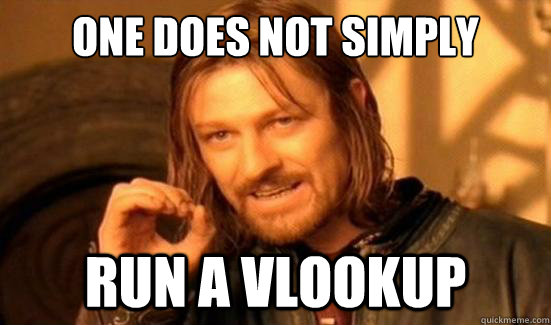

In [30]:
commission= pd.read_excel('Commission.xlsx')

In [31]:
# Join the tables
sales_new = sales.merge(commission, on="Salesperson", how='left').copy()
sales_new

,Salesperson,Company,Yearly_Sales,Commission_x,Commission_y
0,John,A,75000,5250.0,0.07
1,Suzie,A,50000,3500.0,0.09
2,Bob,B,95000,6650.0,0.05


In [33]:
# Rename columns
sales_new.rename(columns = {'Commission_x':'Commission', 'Commission_y':'Rate'}, inplace = True)
sales_new

,Salesperson,Company,Yearly_Sales,Commission,Rate
0,John,A,75000,5250.0,0.07
1,Suzie,A,50000,3500.0,0.09
2,Bob,B,95000,6650.0,0.05


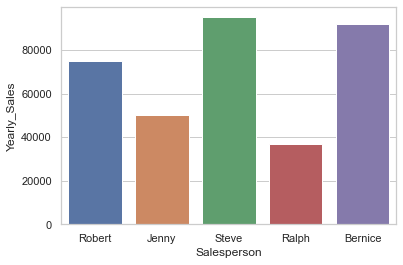

In [16]:
#Data Viz

sns.barplot(x="Salesperson", y="Yearly_Sales", data=sales_new)

<div class="alert alert-block alert-warning"><b> Project Time! </b>
<br> We will walk through a real life example with a multi-sheet spreadsheet. 
    <li> <b> PIVOT Tables </b>-Learn how to make a pivot table in Python 
    <li> <b> VLOOKUP </b>-Learn how to join tables in Python
    <li> <b> Export Results </b>-Learn how to easily export your results!

</div>

In [40]:
# Read in the whole workbook
Project = pd.ExcelFile('Salesperson_Project.xlsx')

# Print the workbook
print(Project)

In [41]:
# Get sheet names
Project.sheet_names

['Sales', 'ProductPr']

In [42]:
# Parse the sales tab of the theater report
sales_new = Project.parse('Sales')
sales_new

,Salesperson,Company,Yearly_Sales
0,Robert,A,75000
1,Jenny,A,50000
2,Steve,B,95000
3,Ralph,B,37000
4,Bernice,C,92000


In [43]:
# Parse the sales tab of the theater report
product_new = Project.parse('ProductPr')
product_new

,Product,Salesperson,Amount
0,Printer,Robert,15000
1,Paper,Jenny,7500
2,Office Chair,Steve,12500
3,Printer,Robert,5000
4,Paper,Jenny,9000
5,Office Chair,Steve,4500


In [44]:
# Multi Column Group By!
Salesperson = ['Salesperson','Product']

product_new.groupby(Salesperson, as_index=False).sum()

,Salesperson,Product,Amount
0,Jenny,Paper,16500
1,Robert,Printer,20000
2,Steve,Office Chair,17000
